# Part II - Factors that Affect Duration of Rides in Bike-Sharing System
## by Chidubem Nwodo

## Investigation Overview


In this investigation, I wanted to look at the factors that affect the duration of rides. The main focus was on the member_age, user_type, and member_gender.


## Dataset Overview

This data set includes information about individual rides made in a ford bike-sharing system covering the greater San Francisco Bay area. It has 16 columns and 183412 entries. The attributes are duration_sec (Duration of rides in seconds), start_time (Start time of the ride), end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type (Customer or Subscriber), member_birth_year, member_gender, bike_share_for_all_trip. Most variables are numeric in nature, but the variables user_type, member_gender, start_station_name, end_station_name, bike_share_for_all_trip are qualitative. 8537 data points were removed from the analysis due to missing information or inaccuracy.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [5]:
# load in the dataset into a pandas dataframe
bike_share = pd.read_csv('fordgobike.csv', parse_dates=['start_time', 'end_time'])

In [3]:
# data wrangling, removing entries with inconsistent or missing data.
bike_share = bike_share.dropna()

In [6]:
# data wrangling, converting the duration_sec variable to datetime in seconds
duration = bike_share['end_time'] - bike_share['start_time']
bike_share['duration_sec'] = duration.dt.total_seconds()

In [7]:
# data wrangling, converting member_birth_year to datetime year type
birth_year = pd.to_datetime(bike_share['member_birth_year'], format = '%Y').dt.year
bike_share['member_birth_year'] = birth_year

In [8]:
# getting the member_age variable by substracting the member_birth_year from start_time.
bike_share['member_age'] = bike_share['start_time'].dt.year - bike_share['member_birth_year']

# Filtering to select members who are below 90 years old
below_90 = bike_share[bike_share['member_age'] < 90]
bike_share = below_90

## Distribution of Ride Duration

When plotted on a log-scale, there seems to be a peak between 500 and 1000. This means that the average trip lasted between 500 to 1000 seconds. Somewhere around 705 seconds. This answers the question of how long an average trip takes.


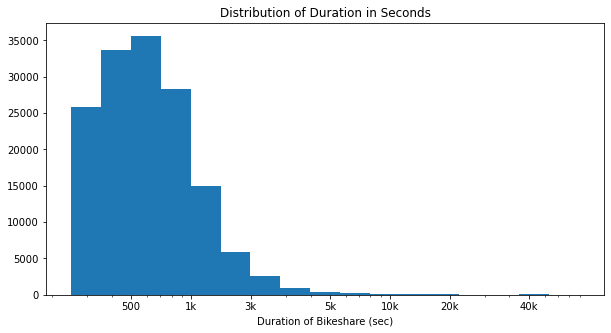

In [20]:
log_binsize = 0.15
bins = 10 ** np.arange(2.4, np.log10(bike_share['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[10, 5])
plt.hist(data = bike_share, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4, 5e4], [500, '1k', '3k', '5k', '10k', '20k', '40k'])
plt.xlabel('Duration of Bikeshare (sec)')
plt.title('Distribution of Duration in Seconds')
plt.show()

## Distribution of Member Age

The distribution of member_age appears to be skewed on the right, with the peek between 25 and 30. This means the members of the bike-sharing system are mostly youths. With very few senior citizens.

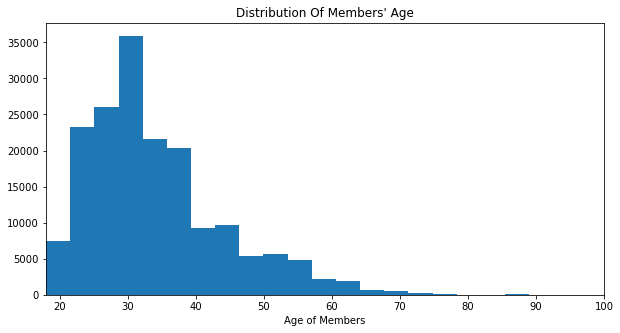

In [15]:
# Plotting a histogram of member_age distribution
plt.figure(figsize=[10, 5])
plt.hist(data = bike_share, x = 'member_age', bins=20);
plt.xlim(18,100);
plt.xlabel('Age of Members');
plt.title('Distribution Of Members\' Age');

## Duration of Rides vs Members' Age

Although the average ride duration falls around 705 seconds, members who are between 20 to 45 years old tend to have rides with the most duration above average. This answers the question, does age affect the duration of rides?

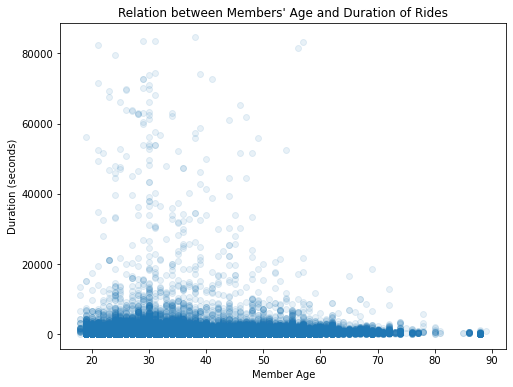

In [23]:
plt.figure(figsize=[8, 6])
plt.scatter(data = bike_share, x = 'member_age', y = 'duration_sec', alpha = 1/10);
plt.xlabel('Member Age');
plt.ylabel('Duration (seconds)');
plt.title('Relation between Members\' Age and Duration of Rides');

##  Duration of Ride by Member Gender and User Type?

The customers who are of the 'Other' gender has more ride durations than customers who are of male and female gender.

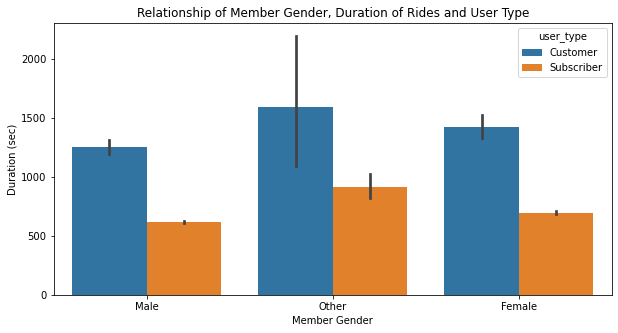

In [21]:
plt.figure(figsize=[10, 5])
sb.barplot(data = bike_share, x = 'member_gender', y = 'duration_sec', hue = 'user_type');
plt.title('Relationship of Member Gender, Duration of Rides and User Type');
plt.xlabel('Member Gender');
plt.ylabel('Duration (sec)');

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [14]:
!jupyter nbconvert <Part_II_slide_deck>.ipynb --to slides --post serve --no-input --no-prompt

The system cannot find the file specified.
